# Heat Exchange Experimental Data Analysis
Presented by Rahil Shaik, Alex Quemel, Ethan Mibu, Sneha Kancharla

In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Pre-processing

In [762]:
df_shell_cc = pd.read_csv("data/MW1_Shell_Counter_Current_formatted.csv")
df_shell_uni = pd.read_csv("data/MW1_Shell_Uni_Flow_formatted.csv")

df_tube_cross_350c_200h = pd.read_csv("data/tubular_cross_data/tubular_cross_350c_200h - tubular_counter_350c_300h.csv")
df_tube_cross_350c_300h = pd.read_csv("data/tubular_cross_data/tubular_counter_350c_300h - tubular_counter_350c_300h.csv")
df_tube_cross_350c_350h = pd.read_csv("data/tubular_cross_data/tubular_counter_350c_350h - tubular_counter_350c_350h.csv")
df_tube_cross_350c_400h = pd.read_csv("data/tubular_cross_data/tubular_counter_350c_400h - tubular_counter_350c_400h.csv")

df_tube_cross_350h_200c = pd.read_csv("data/tubular_cross_data/tubular_cross_350h_200c - tubular_counter_350c_200h.csv")
df_tube_cross_350h_300c = pd.read_csv("data/tubular_cross_data/tubular_cross_350h_300c - WL315C_2025-01-30_14-58-01.csv")
df_tube_cross_350h_350c = pd.read_csv("data/tubular_cross_data/tubular_cross_350h_350c - WL315C_2025-01-30_14-59-40.csv")
df_tube_cross_350h_400c = pd.read_csv("data/tubular_cross_data/tubular_cross_350h_400c - WL315C_2025-01-30_15-05-57.csv")

# df_tube_uni = pd.read_csv("data/MW1_Tube_Tube_Uni_Flow_formatted.csv")

df_plate_cc = pd.read_csv("data/plate_counter_extra.csv")
df_plate_uni = pd.read_csv("data/plate_parallel_extra.csv")

df_water_air_cc = pd.read_csv("data/finned_counter_extra.csv")
df_water_air_uni = pd.read_csv("data/finned_parallel_extra.csv")

In [763]:
df_tube_cross_350c_200h["hot flow (L/hr)"] = 200
df_tube_cross_350c_200h["cold flow (L/hr)"] = 350

df_tube_cross_350c_300h["hot flow (L/hr)"] = 300
df_tube_cross_350c_300h["cold flow (L/hr)"] = 350

df_tube_cross_350c_350h["hot flow (L/hr)"] = 350
df_tube_cross_350c_350h["cold flow (L/hr)"] = 350

df_tube_cross_350c_400h["hot flow (L/hr)"] = 400
df_tube_cross_350c_400h["cold flow (L/hr)"] = 350

df_tube_cross_350h_200c["hot flow (L/hr)"] = 350
df_tube_cross_350h_200c["cold flow (L/hr)"] = 200

df_tube_cross_350h_300c["hot flow (L/hr)"] = 350
df_tube_cross_350h_300c["cold flow (L/hr)"] = 300

df_tube_cross_350h_350c["hot flow (L/hr)"] = 350
df_tube_cross_350h_350c["cold flow (L/hr)"] = 350

df_tube_cross_350h_400c["hot flow (L/hr)"] = 350
df_tube_cross_350h_400c["cold flow (L/hr)"] = 400


In [764]:
df_tube_cross_350c_200h["hot flow (m^3/s)"] = df_tube_cross_350c_200h["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350c_200h["cold flow (m^3/s)"] = df_tube_cross_350c_200h["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350c_300h["hot flow (m^3/s)"] = df_tube_cross_350c_300h["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350c_300h["cold flow (m^3/s)"] = df_tube_cross_350c_300h["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350c_350h["hot flow (m^3/s)"] = df_tube_cross_350c_350h["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350c_350h["cold flow (m^3/s)"] = df_tube_cross_350c_350h["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350c_400h["hot flow (m^3/s)"] = df_tube_cross_350c_400h["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350c_400h["cold flow (m^3/s)"] = df_tube_cross_350c_400h["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350h_200c["hot flow (m^3/s)"] = df_tube_cross_350h_200c["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350h_200c["cold flow (m^3/s)"] = df_tube_cross_350h_200c["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350h_300c["hot flow (m^3/s)"] = df_tube_cross_350h_300c["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350h_300c["cold flow (m^3/s)"] = df_tube_cross_350h_300c["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350h_350c["hot flow (m^3/s)"] = df_tube_cross_350h_350c["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350h_350c["cold flow (m^3/s)"] = df_tube_cross_350h_350c["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350h_400c["hot flow (m^3/s)"] = df_tube_cross_350h_400c["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350h_400c["cold flow (m^3/s)"] = df_tube_cross_350h_400c["cold flow (L/hr)"] / (1000 * 3600)


In [765]:
dfs = [df_tube_cross_350c_200h, df_tube_cross_350c_300h, df_tube_cross_350c_350h, df_tube_cross_350c_400h,
       df_tube_cross_350h_200c, df_tube_cross_350h_300c, df_tube_cross_350h_350c, df_tube_cross_350h_400c ]

In [766]:
df_tube_cross_350c_200h.head(5)

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s)
0,2/13/2025 4:29:46 PM.43,31.6,100,20.2,29.2,34.3,22,36.5,24.5,39.2,26.6,0.09,8,-23.72,3.64,0,13.68,200,350,0.000056,0.000097
1,2/13/2025 4:29:46 PM.93,31.6,100,20.2,29.2,34.3,22,36.5,24.5,39.2,26.6,0.09,9,-23.85,3.63,0,13.74,200,350,0.000056,0.000097
2,2/13/2025 4:29:47 PM.43,31.6,100,20.2,29.2,34.3,22,36.5,24.6,39.2,26.5,0.10,9,-23.81,3.66,0,13.74,200,350,0.000056,0.000097
3,2/13/2025 4:29:47 PM.93,31.6,100,20.2,29.2,34.3,22,36.5,24.5,39.2,26.6,0.10,8,-23.96,3.65,0,13.81,200,350,0.000056,0.000097
4,2/13/2025 4:29:48 PM.43,31.6,100,20.2,29.2,34.3,22,36.5,24.5,39.2,26.6,0.10,8,-23.95,3.63,0,13.79,200,350,0.000056,0.000097


## Analysis Question 1

## Analysis Question 3
For the tubular heat exchanger in counter-current flow configuration:

(a) Identify and report appropriate correlations for predicting the heat transfer
coefficients for the inner tube ($h_i$) and the annular region ($h_0$). Clearly state the
conditions and assumptions under which these correlations are valid (flow regime,
flow condition, characteristic length, etc.).

The first step in determining the appropriate correlations for the heat transfer coefficient in an inner tube is investigating the flow regime using Reynolds number, $Re$, to classify the flow as laminar or turbulent

$$
Re = \frac{\rho u D}{\mu} = \frac{4 \dot m}{\pi D \mu} 
$$

$$
\text{where} \  \dot m = \rho \dot q 
$$

We will use the LHS for classifying flow regime

In [767]:
mu = 0.001 # Pa * s
rho = 1000 # kg / m^3
D_inner = 6 * 10e-3 # m
D_annular = 13 * 10e-3 # m 
D_hydraulic = D_annular - D_inner # m
L = 3.2 # m
k_cold = 0.592 # W / mK
k_hot = 0.613 # W / mK #TODO: update these thermal conductivity values

A_i = np.pi * (D_inner ** 2) / 4
A_h = np.pi * ((D_annular ** 2) - ((D_hydraulic) ** 2)) / 4
print(A_i)

0.0028274333882308137


In [768]:
for df in dfs:
    df["u_cold (m/s)"] = df["cold flow (m^3/s)"] / A_i
    df["u_hot (m/s)"] = df["hot flow (m^3/s)"] / A_h
    df["Re_cold (inner tube)"] = (rho * df["u_cold (m/s)"] * D_inner) / mu
    df["Re_hot (annular region)"] = (rho * df["u_hot (m/s)"] * D_inner) / mu

# for df in dfs:
#     df["mass_cold_flow (kg/s)"] = rho * df["cold flow (m^3/s)"]
#     df["mass_hot_flow (kg/s)"] = rho * df["hot flow (m^3/s)"]

#     df["Re_cold (inner tube)"] = (4 * df["mass_cold_flow (kg/s)"]) / (np.pi * D_inner * mu)
#     df["Re_hot (annular region)"] = (4 * df["mass_hot_flow (kg/s)"]) / (np.pi * D_annular * mu)

In [769]:
df_tube_cross_350h_200c.head(5)

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s),u_cold (m/s),u_hot (m/s),Re_cold (inner tube),Re_hot (annular region)
0,2/13/2025 4:12:29 PM.43,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.10,11,-16.66,3.22,0,9.94,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589
1,2/13/2025 4:12:29 PM.93,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,11,-16.66,3.20,0,9.93,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589
2,2/13/2025 4:12:30 PM.43,27.7,100,17.8,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,10,-16.54,3.20,0,9.87,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589
3,2/13/2025 4:12:30 PM.93,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.10,11,-16.42,3.18,0,9.80,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589
4,2/13/2025 4:12:31 PM.43,27.6,100,17.8,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,10,-16.56,3.23,0,9.90,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589


Since we have some laminar and non-laminar flow, we can break correlations up for laminar and non-laminar flow. 

For laminar flow, we use equation (20-27) from the fundamentals textbook:

$$
Nu_D = 1.86 (Pe( \frac{D}{L})^\frac{1}{3})(\frac{\mu_b}{\mu_w})^{0.14}
$$

and for turbulent flow, we will use Dittus Boelter equation (20-28):

$$
Nu_D = 0.023 Re_D ^ {0.8} Pr^n
$$

$$
\text{where } n_{heated} = 0.4 \text{ and } n_{cooled} = 0.3
$$

**When making slides, reference pages 307 and 308 for assumptions of these two equations**

Once we have these $Nu$ values, we can solve for heat transfer coefficients as

$$
h = \frac{Nu \times k}{D}
$$

In [770]:
df_tube_cross_350h_200c.head(5)

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s),u_cold (m/s),u_hot (m/s),Re_cold (inner tube),Re_hot (annular region)
0,2/13/2025 4:12:29 PM.43,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.10,11,-16.66,3.22,0,9.94,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589
1,2/13/2025 4:12:29 PM.93,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,11,-16.66,3.20,0,9.93,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589
2,2/13/2025 4:12:30 PM.43,27.7,100,17.8,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,10,-16.54,3.20,0,9.87,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589
3,2/13/2025 4:12:30 PM.93,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.10,11,-16.42,3.18,0,9.80,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589
4,2/13/2025 4:12:31 PM.43,27.6,100,17.8,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,10,-16.56,3.23,0,9.90,350,200,0.000097,0.000056,0.019649,0.010316,1178.925504,618.93589


(b) Using empirical correlations, calculate and report the inner tube ($h_i$) and annular region ($h_0$) heat transfer coefficients at a volumetric flow rate of 350 L/hr.

We will be using data from when both hot and cold streams are art 350 L/min given in `df_tube_cross_350h_350c`

In [771]:
pd.set_option("display.max_columns", None)
df_tube_cross_350h_350c.head()

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s),u_cold (m/s),u_hot (m/s),Re_cold (inner tube),Re_hot (annular region)
0,1/30/2025 2:21:15 PM.19,32.9,48.0,20.8,30.1,35.2,22.5,37.3,25.0,39.6,27.2,0.08,1000,-6.17,3.80,0,4.99,350,350,0.000097,0.000097,0.034385,0.010316,2063.119633,618.93589
1,1/30/2025 2:21:15 PM.69,32.9,48.0,20.7,30.0,35.2,22.5,37.3,25.0,39.6,27.2,0.09,1000,-6.12,3.77,0,4.95,350,350,0.000097,0.000097,0.034385,0.010316,2063.119633,618.93589
2,1/30/2025 2:21:16 PM.19,32.9,48.0,20.8,30.0,35.2,22.5,37.3,25.0,39.7,27.3,0.09,1000,-6.17,3.81,0,4.99,350,350,0.000097,0.000097,0.034385,0.010316,2063.119633,618.93589
3,1/30/2025 2:21:16 PM.69,32.8,48.0,20.7,30.0,35.2,22.5,37.3,25.0,39.6,27.2,0.09,1000,-6.21,3.81,0,5.01,350,350,0.000097,0.000097,0.034385,0.010316,2063.119633,618.93589
4,1/30/2025 2:21:17 PM.19,32.8,48.1,20.8,30.1,35.1,22.5,37.3,25.0,39.6,27.3,0.09,1000,-6.21,3.81,0,5.01,350,350,0.000097,0.000097,0.034385,0.010316,2063.119633,618.93589


Both flow regimes are laminar in this case as inner tube and annular flow is $< 2300$, so we will use equation (20-27)

$$
Nu_D = 1.86 (Pe( \frac{D}{L})^\frac{1}{3})(\frac{\mu_b}{\mu_w})^{0.14}
$$

In order, to get Peclet number, $Pe$, we must solve for it using $Re$ and $Pr$. From _Fundamentals of Momentum, Heat and Mass_, table A.6 $35 \degree \text{C}$, $Pr$ = 7 for cold flow and $Pr$ = 5.0 for hot flow.

**Update Prandtl numbers**


In [772]:
df_tube_cross_350h_350c["Pr_cold (inner tube)"] = 0.07
df_tube_cross_350h_350c["Pr_hot (annular region)"] = 0.05

In [773]:
df_tube_cross_350h_350c["Pe_cold (inner tube)"] = df_tube_cross_350h_350c["Re_cold (inner tube)"] * df_tube_cross_350h_350c["Pr_cold (inner tube)"]
df_tube_cross_350h_350c["Pe_hot (annular region)"] = df_tube_cross_350h_350c["Re_hot (annular region)"] * df_tube_cross_350h_350c["Pr_hot (annular region)"]

In [774]:
T_c_bulk = 16 + 273.15 # K
T_h_bulk = 39 + 273.15 # K

T_wall = (T_c_bulk + T_h_bulk) / 2# K
T_wall

300.65

To get $\mu_w$ we will assume that the wall between the hot and cold tube is at the average of the hot and cold water flow temperatures which from our experiment we have as:

$$
T_{c, bulk} = 16 \degree C \text{ and } T_{h, bulk} = 39 \degree \text{C}
$$

using the bulk temperatures and this, we can get viscosities from the below expression which has dependence on the thermometer readings across the tubes

$$
\mu(T1 - T8) \text{ mPa s}
$$

$$
\mu_w(T = 22.5 \degree \text{C}) = 0.911 \text{ mPa s}
$$



**confirm this viscosity formula**

In [775]:
mu_w = 0.911 # mPa * s

def vogel(T_C):
    A = 2.414e-5
    B = 247.8
    C = 140
    mu_mPa_s = A * 10**(B / ((T_C+273.15) - C))  # in mPa·s
    mu_Pa_s = mu_mPa_s / 1000           # convert to Pa·s
    return mu_Pa_s

In [776]:
mean_temps = df_tube_cross_350h_350c.mean(numeric_only=True)

In [777]:
mean_temps

T1 (°C)                      32.816000
T2 (°C)                      48.014000
T3 (°C)                      20.634000
T4 (°C)                      30.006000
T5 (°C)                      35.194000
T6 (°C)                      22.500000
T7 (°C)                      37.300000
T8 (°C)                      25.086000
T9 (°C)                      39.616000
T10 (°C)                     27.274000
dp1 (mbar)                    0.083200
dp2 (mbar)                 1000.000000
dQ1/dt (kW)                  -6.188600
dQ2/dt (kW)                   3.845400
dQ3/dt (kW)                   0.000000
dQm/dt (kW)                   5.017800
hot flow (L/hr)             350.000000
cold flow (L/hr)            350.000000
hot flow (m^3/s)              0.000097
cold flow (m^3/s)             0.000097
u_cold (m/s)                  0.034385
u_hot (m/s)                   0.010316
Re_cold (inner tube)       2063.119633
Re_hot (annular region)     618.935890
Pr_cold (inner tube)          0.070000
Pr_hot (annular region)  

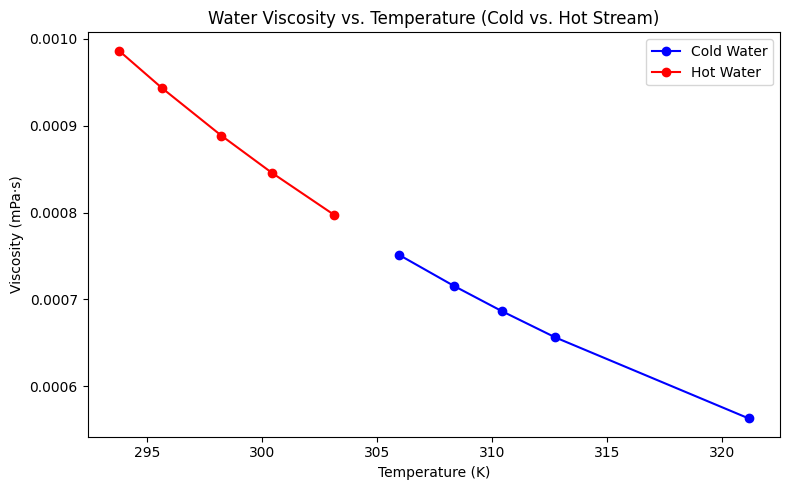

In [778]:
cold_thermocouples = ["T1 (°C)", "T5 (°C)", "T7 (°C)", "T9 (°C)", "T2 (°C)"]   # cold water path
hot_thermocouples  = ["T3 (°C)", "T6 (°C)", "T8 (°C)", "T10 (°C)", "T4 (°C)"]  # hot water path

cold_temps = np.array([mean_temps[t] for t in cold_thermocouples])
hot_temps  = np.array([mean_temps[t] for t in hot_thermocouples])

cold_visc = np.array([vogel(T) for T in cold_temps])
hot_visc  = np.array([vogel(T) for T in hot_temps])

plt.figure(figsize=(8, 5))
plt.plot([cold_temp +273.15 for cold_temp in cold_temps], cold_visc * 1e3, 'bo-', label='Cold Water')  # mPa·s
plt.plot([hot_temp +273.15 for hot_temp in hot_temps],  hot_visc  * 1e3, 'ro-', label='Hot Water')   # mPa·s
plt.xlabel("Temperature (K)")
plt.ylabel("Viscosity (mPa·s)")
plt.title("Water Viscosity vs. Temperature (Cold vs. Hot Stream)")
plt.legend()
plt.tight_layout()
plt.show()


In [779]:
print(df_tube_cross_350h_350c["Pe_cold (inner tube)"].mean())

144.41837428709022


In [780]:
Nu_cold = 1.86 * df_tube_cross_350h_350c["Pe_cold (inner tube)"].mean() * (D_inner/L) ** (1/3) * (cold_visc / mu_w) ** 0.14
Nu_hot = 1.86 * df_tube_cross_350h_350c["Pe_hot (annular region)"].mean() * (D_annular/L) ** (1/3) * (hot_visc / mu_w) ** 0.14

In [781]:
Nu_hot

array([2.89223019, 2.87427551, 2.85026908, 2.83071176, 2.80720788])

The final step is computing heat transfer coefficient as

$$
h = \frac{Nu \times k}{D}
$$

**get thermal conductivity with temperature dependence**

In [782]:
h_cold = (Nu_cold * k_cold) / D_inner
h_hot = (Nu_hot * k_hot) / D_annular

In [783]:
h_cold

array([99.06517693, 98.39392493, 97.8187439 , 97.20612995, 95.14484286])

(c) Calculate the theoretical heat transfer coefficient ($U_{theory}$) using thermal
resistances and compare it with the experimental value ($U_{exp}$).

We can solve for heat transfer coefficient using the equation (4) from the lab manual

$$
U = (\frac{1}{h_i} + \frac{D_i}{D_o} \times \frac{1}{h_o})^{-1}
$$

In [784]:
U = ((1/h_cold) + (D_inner/D_annular) * (1/h_hot)) ** (-1)

In [785]:
U.mean()

np.float64(22.428477273495275)

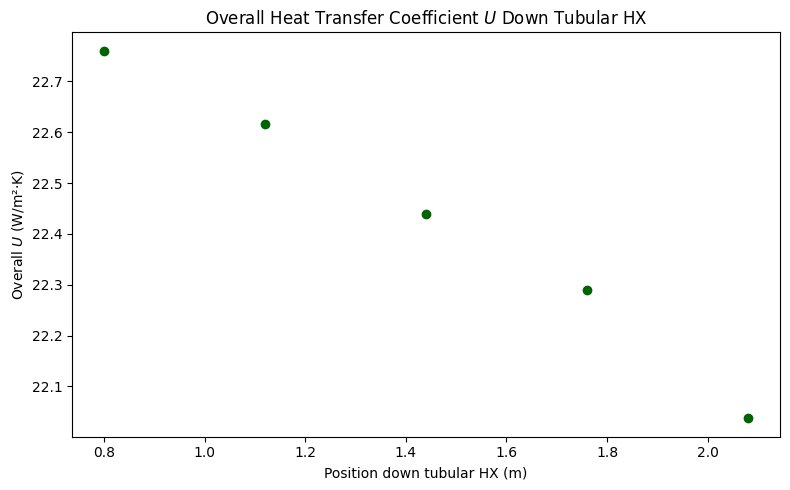

In [786]:
df = pd.DataFrame({
    'Segment': np.arange(1, 10, 2), # thermocouple numbers -> TODO: replace with positions
    'position': np.arange(.800, 2.400, 1.600/5),
    'h_cold (W/m²·K)': h_cold,
    'h_hot (W/m²·K)': h_hot,
    'U (W/m²·K)': U
})


plt.figure(figsize=(8, 5))
plt.scatter(df['position'], df['U (W/m²·K)'], marker='o', linestyle='-', color='darkgreen')
plt.xlabel("Position down tubular HX (m)")
plt.ylabel("Overall $U$ (W/m²·K)")
plt.title("Overall Heat Transfer Coefficient $U$ Down Tubular HX")
plt.tight_layout()
plt.show()


(d) Maintain a constant outer flow rate of 350 L/hr and vary the inner flow rate (200, 300, 400 L/hr). Experimentally determine how $h_i$ vary with changing fluid flow rates.

We will extend the analysis we did at 350 L/hr for both directions to a varying inner flow rate. Our first step is checking if the flow is laminar for all of these cases. 

In [787]:
dfs = [df_tube_cross_350h_200c, df_tube_cross_350h_300c, df_tube_cross_350h_350c, df_tube_cross_350h_400c]

In [788]:
for df in dfs:
    print(df[["Re_cold (inner tube)", "Re_hot (annular region)"]].iloc[0])

Re_cold (inner tube)       1178.925504
Re_hot (annular region)     618.935890
Name: 0, dtype: float64
Re_cold (inner tube)       1768.388257
Re_hot (annular region)     618.935890
Name: 0, dtype: float64
Re_cold (inner tube)       2063.119633
Re_hot (annular region)     618.935890
Name: 0, dtype: float64
Re_cold (inner tube)       2357.851009
Re_hot (annular region)     618.935890
Name: 0, dtype: float64


In [789]:
h_colds = []
h_hots = []

for i, df in enumerate(dfs):
    df["Pr_cold (inner tube)"] = 0.07
    df["Pr_hot (annular region)"] = 0.05
    df["Pe_cold (inner tube)"] = df["Re_cold (inner tube)"] * df["Pr_cold (inner tube)"]
    df["Pe_hot (annular region)"] = df["Re_hot (annular region)"] * df["Pr_hot (annular region)"]
    mean_temps = df.mean(numeric_only=True)

    cold_temps = np.array([mean_temps[t] for t in cold_thermocouples])
    hot_temps  = np.array([mean_temps[t] for t in hot_thermocouples])
    cold_visc = np.array([vogel(T) for T in cold_temps])
    hot_visc  = np.array([vogel(T) for T in hot_temps])
    Nu_cold = 1.86 * df["Pe_cold (inner tube)"].mean() * (D_inner/L) ** (1/3) * (cold_visc / mu_w) ** 0.14
    Nu_hot = 1.86 * df["Pe_hot (annular region)"].mean() * (D_annular/L) ** (1/3) * (hot_visc / mu_w) ** 0.14
    h_cold = (Nu_cold * k_cold) / D_inner
    h_hot = (Nu_hot * k_hot) / D_annular
    h_colds.append(h_cold.mean())
    h_hots.append(h_hot.mean())

In [790]:
(h_colds[0])

np.float64(55.216309796626334)

(e) Compare the experimentally determined scaling of $h$ with theoretical predictions, which suggest $h \propto Re^m$, where $m$ depends on the flow regime. Plot $h$ values against flow rate for both experimental results and theoretical correlations.

First we will plot the experimental results for h against flow rates

Text(0.5, 1.0, 'experimental hot and cold flow heat transfer coefficient scaling')

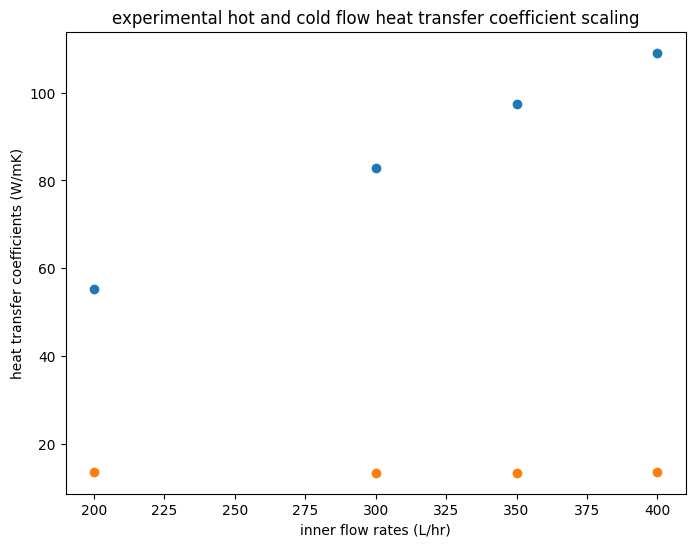

In [791]:
inner_flows = [200, 300, 350, 400]
plt.figure(figsize=(8,6))
plt.scatter(inner_flows, h_colds, label = "cold water flow heat transfer coeff")
plt.scatter(inner_flows, h_hots, label = "hot water flow heat transfer coeff")
plt.xlabel("inner flow rates (L/hr)")
plt.ylabel("heat transfer coefficients (W/mK)")
plt.title("experimental hot and cold flow heat transfer coefficient scaling")

In [792]:
h_hots

[np.float64(13.60037993695779),
 np.float64(13.410519604023511),
 np.float64(13.443273362697994),
 np.float64(13.48175437888016)]

Plotting this on log-log scale to see the scaling

(np.float64(0.992380958240932), np.float64(-0.014775555720365662))

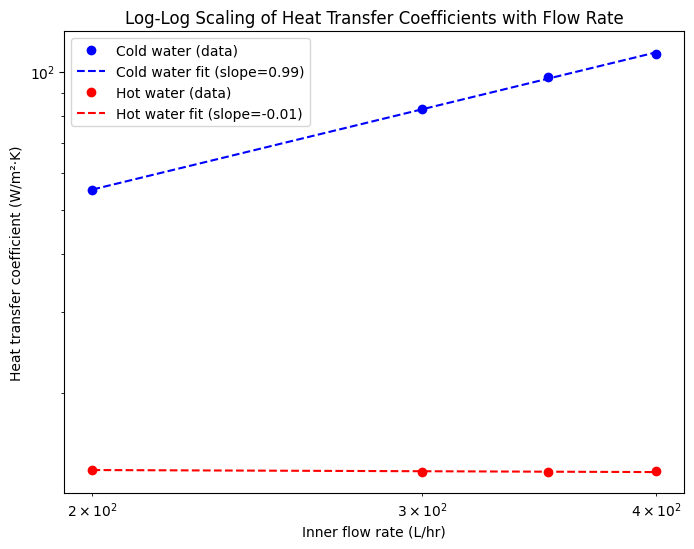

In [793]:
inner_flows = np.array(inner_flows)

log_flows = np.log(inner_flows)
log_h_colds = np.log(h_colds)
log_h_hots = np.log(h_hots)

slope_cold, intercept_cold = np.polyfit(log_flows, log_h_colds, 1)
slope_hot, intercept_hot = np.polyfit(log_flows, log_h_hots, 1)

flow_range = np.linspace(inner_flows.min(), inner_flows.max(), 100)
fit_h_colds = np.exp(intercept_cold) * flow_range ** slope_cold
fit_h_hots = np.exp(intercept_hot) * flow_range ** slope_hot

plt.figure(figsize=(8, 6))
plt.loglog(inner_flows, h_colds, 'bo', label='Cold water (data)')
plt.loglog(flow_range, fit_h_colds, 'b--', label=f'Cold water fit (slope={slope_cold:.2f})')

plt.loglog(inner_flows, h_hots, 'ro', label='Hot water (data)')
plt.loglog(flow_range, fit_h_hots, 'r--', label=f'Hot water fit (slope={slope_hot:.2f})')

plt.xlabel("Inner flow rate (L/hr)")
plt.ylabel("Heat transfer coefficient (W/m²·K)")
plt.title("Log-Log Scaling of Heat Transfer Coefficients with Flow Rate")
plt.legend()

(slope_cold, slope_hot)


Then, we can plot the theoretical correlation between $h$ and flow rate using $Re$ since $Re \propto u = (\frac{\dot q}{A})$. The expected scaling is $h \propto Re^{1/3}$ as given by Sieder–Tate equation (20-27):

$$
\frac{hD}{k} = 1.86 (RePr( \frac{D}{L})^\frac{1}{3})(\frac{\mu_b}{\mu_w})^{0.14}
$$




In [794]:
Reynolds = [df["Re_cold (inner tube)"].mean() for df in dfs]

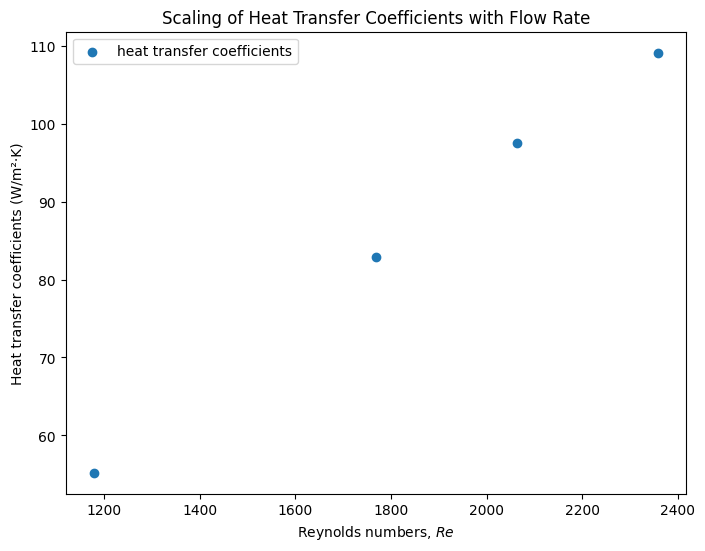

In [795]:
plt.figure(figsize=(8,6))
plt.scatter(Reynolds, h_colds, label="heat transfer coefficients")
plt.xlabel("Reynolds numbers, $Re$")
plt.ylabel("Heat transfer coefficients (W/m²·K)")
plt.title("Scaling of Heat Transfer Coefficients with Flow Rate")
plt.legend()

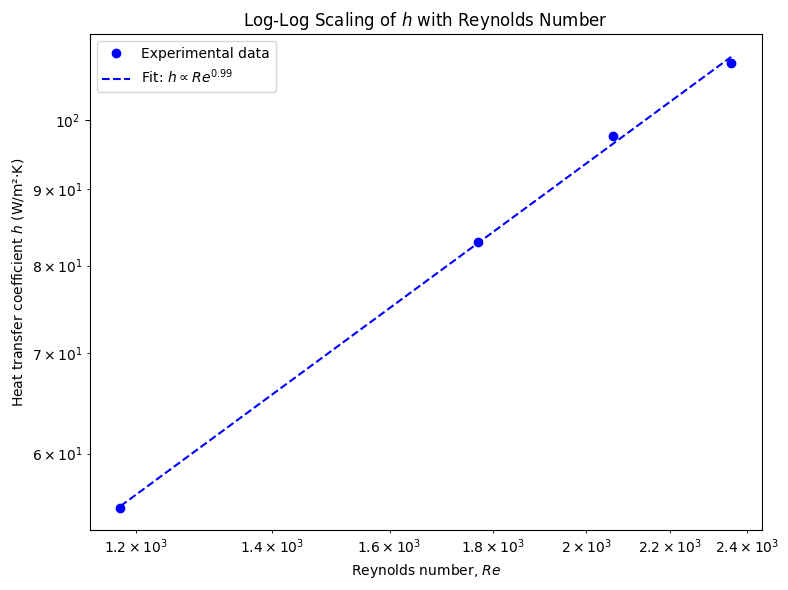

np.float64(0.9923809582409291)

In [796]:
log_Re = np.log(Reynolds)
log_h = np.log(h_colds)

slope, intercept = np.polyfit(log_Re, log_h, 1)
fit_h = np.exp(intercept) * Reynolds ** slope

plt.figure(figsize=(8, 6))
plt.loglog(Reynolds, h_colds, 'bo', label="Experimental data")
plt.loglog(Reynolds, fit_h, 'b--', label=f'Fit: $h \\propto Re^{{{slope:.2f}}}$')

plt.xlabel("Reynolds number, $Re$")
plt.ylabel("Heat transfer coefficient $h$ (W/m²·K)")
plt.title("Log-Log Scaling of $h$ with Reynolds Number")
plt.legend()
plt.tight_layout()
plt.show()

slope
